In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


import numpy as np
import pandas as pd
import tensorflow as tf

import atecml.data
import atecml.fs

from contextlib import contextmanager
from tqdm import tqdm
from time import strftime,time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

plt.style.use('ggplot')

In [2]:
train_df = pd.read_pickle('../DeepForest/res.dat')
predictors = [x for x in train_df.columns if x not in atecml.data.NOT_FEATURE_COLUMNS]
target ='Fraud'

In [3]:
fs = atecml.fs.FeatureSelector(data=train_df[predictors],labels=train_df[target])
#fs = joblib.load('./fs.model')

# 处理缺失值

In [4]:
fs.identify_missing(missing_threshold=0.9)

12 features with greater than 0.90 missing values.



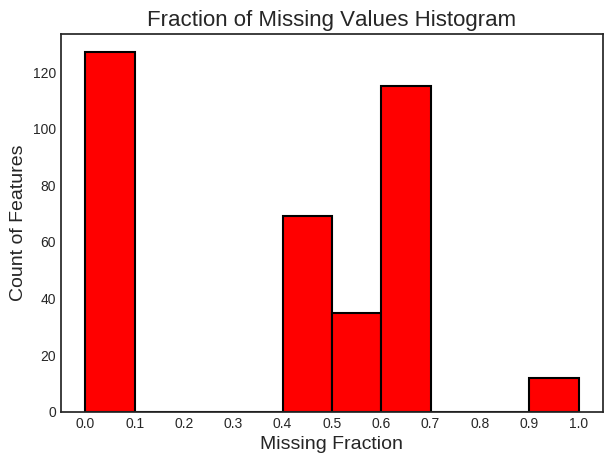

In [5]:
#缺失率分布
fs.plot_missing()

In [6]:
fs.missing_stats.head(14)

,missing_fraction
f47,0.979078
f36,0.979078
f37,0.979078
f38,0.979078
f39,0.979078
f40,0.979078
f41,0.979078
f42,0.979078
f43,0.979078
f44,0.979078


In [7]:
missing_features = fs.ops ['missing']
missing_features

['f36',
 'f37',
 'f38',
 'f39',
 'f40',
 'f41',
 'f42',
 'f43',
 'f44',
 'f45',
 'f46',
 'f47']

# 处理高相关的特征

In [8]:
fs.identify_collinear(correlation_threshold = 0.98)

104 features with a correlation magnitude greater than 0.98.



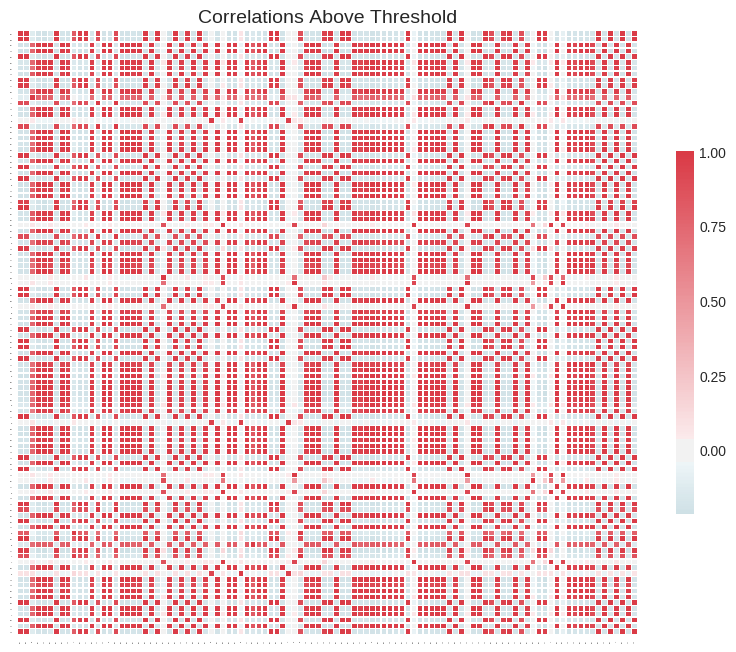

In [9]:
fs.plot_collinear()

In [10]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']

In [ ]:
# dataframe of collinear features
fs.record_collinear.head()

,corr_feature,corr_value,drop_feature
0,f21,0.988655,f23
1,f24,0.991306,f26
2,f25,0.996315,f27
3,f33,0.983364,f49
4,f34,0.985308,f50


# 根据GBM训练查找Zero Important Feature

In [ ]:
fs.identify_zero_importance (task = 'classification', eval_metric = 'auc', n_iterations = 10, early_stopping = True)
#joblib.dump(fs,'./fs.model')

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[683]	valid_0's auc: 0.943179
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[999]	valid_0's auc: 0.939071
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[650]	valid_0's auc: 0.940294
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[946]	valid_0's auc: 0.932294
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[920]	valid_0's auc: 0.944618
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[562]	valid_0's auc: 0.939203
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[551]	valid_0's auc: 0.938922


In [ ]:
zero_importance_features = fs.ops['zero_importance']

In [ ]:
#绘制特征重要性
fs.plot_feature_importances(threshold=0.99,plot_n=40)

# 查看低重要性的特征[PCA]

In [ ]:
#查看低重要性的特征[PCA]
fs.identify_low_importance(cumulative_importance=0.99)

In [ ]:
low_importance_features = fs.ops['low_importance']

In [ ]:
fs.feature_importances.head(20)

In [ ]:
list(fs.feature_importances.head(20)['feature'])

# 单一的唯一价值特征

In [ ]:
fs.identify_single_unique()

# 总结

In [ ]:
remove_feature = set(missing_features + collinear_features + zero_importance_features + low_importance_features)

In [28]:
#joblib.dump(fs,'./fs.model')

['./fs.model',
 './fs.model_01.npy',
 './fs.model_02.npy',
 './fs.model_03.npy',
 './fs.model_04.npy',
 './fs.model_05.npy',
 './fs.model_06.npy',
 './fs.model_07.npy',
 './fs.model_08.npy',
 './fs.model_09.npy',
 './fs.model_10.npy',
 './fs.model_11.npy',
 './fs.model_12.npy',
 './fs.model_13.npy',
 './fs.model_14.npy',
 './fs.model_15.npy',
 './fs.model_16.npy',
 './fs.model_17.npy',
 './fs.model_18.npy',
 './fs.model_19.npy',
 './fs.model_20.npy',
 './fs.model_21.npy',
 './fs.model_22.npy',
 './fs.model_23.npy',
 './fs.model_24.npy',
 './fs.model_25.npy',
 './fs.model_26.npy',
 './fs.model_27.npy',
 './fs.model_28.npy',
 './fs.model_29.npy',
 './fs.model_30.npy',
 './fs.model_31.npy',
 './fs.model_32.npy',
 './fs.model_33.npy',
 './fs.model_34.npy',
 './fs.model_35.npy',
 './fs.model_36.npy',
 './fs.model_37.npy']

In [29]:
#Add the following line to Lib/data.py
NOT_IMP_FEATURE =['f114', 'f231', 'f280', 'f154', 'f251', 'f208', 'f127', 'f292', 'f157', 'f223', 'f189', 'f229', 'f255', 'f51', 'f230', 'f253', 'f27', 'f143', 'f39', 'f120', 'f209', 'f67', 'f146', 'f142', 'f59', 'f121', 'f22', 'f151', 'f248', 'f293', 'f125', 'f232', 'f165', 'f200', 'f290', 'f40', 'f225', 'f35', 'f136', 'f69', 'f138', 'f135', 'f26', 'f49', 'f163', 'f145', 'f227', 'f139', 'f252', 'f118', 'f164', 'f113', 'f116', 'f119', 'f222', 'f242', 'f297', 'f206', 'f152', 'f47', 'f243', 'f218', 'f46', 'f207', 'f131', 'f214', 'f140', 'f115', 'f130', 'f228', 'f213', 'f45', 'f294', 'f37', 'f250', 'f238', 'f70', 'f249', 'f272', 'f126', 'f281', 'f124', 'f42', 'f128', 'f122', 'f38', 'f148', 'f166', 'f137', 'f147', 'f123', 'f133', 'f60', 'f149', 'f217', 'f112', 'f268', 'f144', 'f287', 'f220', 'f36', 'f109', 'f44', 'f221', 'f50', 'f216', 'f226', 'f153', 'f48', 'f111', 'f54', 'f129', 'f23', 'f75', 'f233', 'f43', 'f41', 'f224', 'f247', 'f74', 'f63', 'f117', 'f196', 'f289', 'f211', 'f246', 'f141', 'f295', 'f286', 'f288', 'f71', 'f212', 'f132', 'f150']

# 处理Categorical 特征

In [51]:
unique_dict = {}
NOT_FEATURE = atecml.data.NOT_FEATURE_COLUMNS+ NOT_IMP_FEATURE
features = [x for x in train_df.columns if x not in NOT_FEATURE]

Category_Feature_list =[]
for item in  features:
    col_unique_count = len(train_df[item].unique())
    unique_dict[item] = col_unique_count
    if (col_unique_count < 16):
        Category_Feature_list.append(item)


In [52]:
Category_Feature_list

['f1',
 'f2',
 'f3',
 'f4',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f28',
 'f29',
 'f61',
 'f87',
 'f88',
 'f89',
 'f90',
 'f98',
 'f99',
 'f155',
 'f156',
 'f158',
 'f159',
 'f160',
 'f167',
 'f168',
 'f169',
 'f170',
 'f171',
 'f172',
 'f173',
 'f174',
 'f175',
 'f176',
 'f177',
 'f179',
 'f180',
 'f181',
 'f182',
 'f183',
 'f186',
 'f187',
 'f188',
 'f190',
 'f191',
 'f194',
 'f195',
 'f197',
 'f198',
 'f199',
 'f201',
 'f202',
 'f203',
 'f254',
 'f256',
 'f257',
 'f258',
 'f267',
 'f269',
 'f273',
 'f274',
 'f275',
 'f276',
 'f277']